In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

#### Function- Create Table for Missing Data Analysis

In [1]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

#### Function- Plot Learning Curve

In [3]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Validation score")

    plt.legend(loc="best")
    return plt

#### Function-Plot Validation Curve

In [4]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    train_scores, test_scores = validation_curve(estimator, X, y, param_name, param_range, cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, color='r', marker='o', markersize=5, label='Training score')
    plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='r')
    plt.plot(param_range, test_mean, color='g', linestyle='--', marker='s', markersize=5, label='Validation score')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='g')
    plt.grid() 
    plt.xscale('log')
    plt.legend(loc='best') 
    plt.xlabel('Parameter') 
    plt.ylabel('Score') 
    plt.ylim(ylim)

In [5]:
df=pd.read_csv("Titanic\\train.csv")
df_raw=df.copy()#Save original data set

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print("Data Shape: {}".format(df.shape))

Data Shape: (891, 12)


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


>Min and max values. This can give us an idea about the range of values and is helpful to detect outliers. In our case, all the min and max values seem reasonable and in a reasonable range of values. The only exception could eventually be the max value of 'Fare', but for now we will leave it as it is.

>Mean and standard deviation. The mean shows us the central tendency of the distribution, while the standard deviation quantifies its amount of variation. For example, a low standard deviation suggests that data points tend to be close to the mean. Giving a quick look to our values, there's nothing that looks like obviously wrong.

>Count. This is important to give us a first perception about the volume of missing data. Here, we can see that some 'Age' data is missing.

In [9]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harris, Mrs. Henry Birkhardt (Irene Wallach)",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
draw_missing_data_table(df)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


>Cabin' has too many missing values (>25%). Dogma! We need to delete this variable right away.

>'Age' can be imputed. For now, I'll associate a value that allows me to know that I'm imputing data. Later, I'll revise this strategy.

>Due to the low percentage of missing values, I'll delete the observations where we don't know 'Embarked'.


In [11]:
df.drop("Cabin",axis=1,inplace=True)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Fill missing values in age with a specific value

#### Age Imputation

The steps to implement this new imputation method are:

>Extract titles from 'Name'.

>Plot a figure with both features and confirm that there is a connection between titles and age.

>For each title, get people's average age and use it to fill missing values.

In [13]:
# Extract titles from name
df['Title']=0
for i in df:
    df['Title']=df_raw['Name'].str.extract('([A-Za-z]+)\.', expand=False)  # Use REGEX to define a search pattern
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [14]:
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

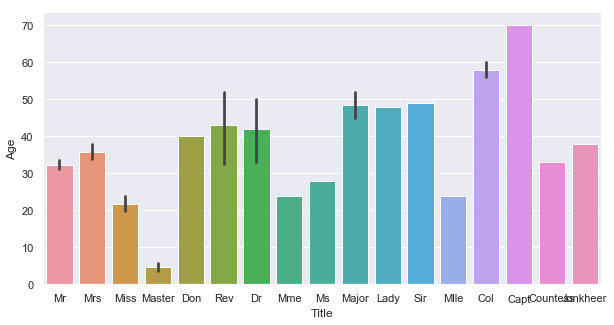

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(y=df["Age"],x=df["Title"]);

>Bar plot gives us an estimate of central tendency for a numeric variable (height of each rectangle) and an indication of the uncertainty around that estimate (error bars in black).

>Apart from Rev and Dr, which have a larger error bar, the mean value seems to accurately represent the data of all the other features. This validates our approach.

>Here [https://www.biologyforlife.com/interpreting-error-bars.html] you can find a short and sweet intro to error bars interpretation.



In [16]:
means=df.groupby("Title")["Age"].mean()
means

Title
Capt        70.000000
Col         58.000000
Countess    33.000000
Don         40.000000
Dr          42.000000
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       4.574167
Miss        21.773973
Mlle        24.000000
Mme         24.000000
Mr          32.368090
Mrs         35.898148
Ms          28.000000
Rev         43.166667
Sir         49.000000
Name: Age, dtype: float64

In [17]:
#transform means to dictionary
map_means=means.to_dict()
map_means

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.773972602739725,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.898148148148145,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [18]:
idx_nan_age=df.loc[np.isnan(df["Age"])].index
df.loc[idx_nan_age,'Age']=df['Title'].map(map_means)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [19]:
#Identify Imputed Data
df["Imputed"]=0
df.at[idx_nan_age,"Imputed"]=1

In [20]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,0
5,6,0,3,"Moran, Mr. James",male,32.368090,0,0,330877,8.4583,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,0


Delete observations for missing values in Embarked

In [21]:
df.drop(df[pd.isnull(df["Embarked"])].index,inplace=True)

In [22]:
df["Embarked"].isnull().sum()

0

### Machine Learning Plan

>Select a performance metric and a target value for this metric. This metric will guide your work and allow you to know how well you're performing. In our case, our performance metric will be 'accuracy' because it is the one defined by Kaggle.

>Quickly set up a working end-to-end pipeline. This should allow you to estimate the selected performance metric.

>Monitor the system to understand its behaviour, in particular to understand whether its poor performance is related to underfitting, overfitting or defects.

>Improve the system by iteration. Here we can apply feature engineering, tune hyperparameters or even change the algorithm, according to the outputs of our monitoring system.

### Preparing the Data

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
Title          889 non-null object
Imputed        889 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


>We don't need 'PassengerId' for prediction purposes, so we will exclude it.

>'Sex', 'Embarked', and 'Pclass' should be categorical. I'll not consider 'Survived' as categorical because it's the output variable.

>We need to parse 'Name' and 'Ticket'. For now, I'll ignore these features.

>'SibSp' could be grouped with 'Parch' to create a 'Family' feature. For now, I'll just identify if the passenger is travelling alone or with family.

In [24]:
df.drop("PassengerId",axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Imputed
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


#### Defiine Categorical Variables

In [25]:
df["Sex"]=pd.Categorical(df["Sex"])
df["Embarked"]=pd.Categorical(df["Embarked"])
df["Pclass"]=pd.Categorical(df["Pclass"])

#### Create Family features

In [26]:
df["Family_Size"]=df["SibSp"]+df["Parch"]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Imputed,Family_Size
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,0


In [27]:
#Drop columns of no use
df.drop(["SibSp","Parch","Name","Ticket","Title","Imputed"],axis=1,inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_Size
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


#### Create Dummies

In [29]:
df=pd.get_dummies(df,drop_first=True)
df.head()


,Survived,Age,Fare,Family_Size,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,7.2500,1,0,1,1,0,1
1,1,38.0,71.2833,1,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,0,1
3,1,35.0,53.1000,1,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,1,0,1


In [30]:
X=df[df.loc[:,df.columns!="Survived"].columns]
y=df["Survived"]
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [31]:
print("Input Train Data: \n",x_train.head())
print("Input Test Data: \n",y_train.head())


Input Train Data: 
           Age      Fare  Family_Size  Pclass_2  Pclass_3  Sex_male  \
121  32.36809    8.0500            0         0         1         1   
687  19.00000   10.1708            0         0         1         1   
790  32.36809    7.7500            0         0         1         1   
837  32.36809    8.0500            0         0         1         1   
659  58.00000  113.2750            2         0         0         1   

     Embarked_Q  Embarked_S  
121           0           1  
687           0           1  
790           1           0  
837           0           1  
659           0           0  
Input Test Data: 
 121    0
687    0
790    0
837    0
659    0
Name: Survived, dtype: int64


In [32]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
scores=cross_val_score(logreg,x_train,y_train,cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.796 +/- 0.023


C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a

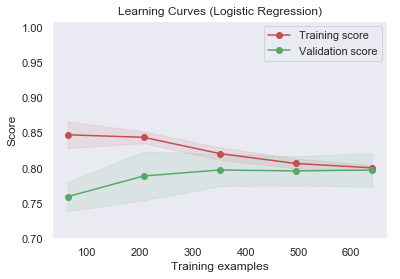

In [36]:
title = "Learning Curves (Logistic Regression)"
cv = 10
plot_learning_curve(logreg, title, x_train, y_train, ylim=(0.7, 1.01), cv=cv, n_jobs=1);

### Learning curves in a nutshell:

>Learning curves allow us to diagnose if the is overfitting or underfitting.

>When the model overfits, it means that it performs well on the training set, but not not on the validation set. Accordingly, the model is not able to generalize to unseen data. If the model is overfitting, the learning curve will present a gap between the training and validation scores. Two common solutions for overfitting are reducing the complexity of the model and/or collect more data.

>On the other hand, underfitting means that the model is not able to perform well in either training or validations sets. In those cases, the learning curves will converge to a low score value. When the model underfits, gathering more data is not helpful because the model is already not being able to learn the training data. Therefore, the best approaches for these cases are to improve the model (e.g., tuning the hyperparameters) or to improve the quality of the data (e.g., collecting a different set of features).

#### Discussion of our results:

>The model doesn't overfit. As we can see, the curves converge and no gap between the training and the validation score exists in the last points of the curve.

>The model underfits. Our final score is about 0.786. Although our model does better predictions than a flip-a-coin strategy, it is still far from being an 'intelligent' model. For now, it's just an 'artificial' model.

C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\AjayKumar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solve

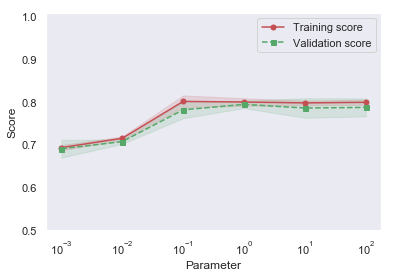

In [38]:
# Plot validation curve
title = 'Validation Curve (Logistic Regression)'
param_name = 'C'
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
cv = 10
plot_validation_curve(estimator=logreg, title=title, X=x_train, y=y_train, param_name=param_name,
                      ylim=(0.5, 1.01), param_range=param_range);

### Validation curves in a nutshell:

>Validation curves are a tool that we can use to improve the performance of our model. It counts as a way of tuning our hyperparameters.

>They are different from the learning curves. Here, the goal is to see how the model parameter impacts the training and validation scores. This allow us to choose a different value for the parameter, to improve the model.

>Once again, if there is a gap between the training and the validation score, the model is probably overfitting. In contrast, if there is no gap but the score value is low, we can say that the model underfits.
Discussion of our results:

The figure shows that there is no huge difference in model's performance as far as we choose a C value of  10−1  or higher. Note that in a logistic regression, C is the only model parameter that we can change (see scikit-learn documentation).